<a href="https://colab.research.google.com/github/OluwajobaOluwabori/kep_text_classification/blob/main/Text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA PREPROCESSING**

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np

In [ ]:
#Reading datafiles
airtime_and_data1 = pd.read_json("/content/9_mobile_transactions.json",)
airtime_and_data2 = pd.read_json("/content/airtel_transactions.json")
airtime_and_data3 = pd.read_json("/content/airtime_transactions.json")
Transport2 = pd.read_json("/content/bolt_transactions.json")
entertainment2 = pd.read_json("/content/entertainment2_transactions.json")
entertainment1 = pd.read_json("/content/entertainment_transactions.json")
airtime_and_data4 = pd.read_json("/content/etisalat_transactions.json")
food3 = pd.read_json("/content/food__RESTAURANT-ransactions.json")
food1 = pd.read_json("/content/food__chicken-transactions.json")
food2 = pd.read_json("/content/food__kitchen-transactions.json")
airtime_and_data5 = pd.read_json("/content/glo_transactions.json")
health = pd.read_json("/content/health_pharmacy_transactions.json")
investment_and_loans = pd.read_json("/content/investment_transactions.json")
airtime_and_data6 = pd.read_json("/content/mtn_transactions.json")
shopping1 = pd.read_json("/content/shopping_2_transactions.json")
shopping2 = pd.read_json("/content/shopping_PRINCE EBEANOtransactions.json")
shopping3 = pd.read_json("/content/shopping_transactions.json")
Transport1 = pd.read_json("/content/taxify_transactions.json")
Transport3 = pd.read_json("/content/uber_transactions.json")
utility = pd.read_json("/content/utility-transactions.json")
df= pd.read_excel("/content/Customer Statement j.xlsx",sheet_name='Sheet2')

In [ ]:
#Merging the datafiles into one 
airtime_and_data = airtime_and_data1.append([airtime_and_data2,airtime_and_data3,
                                           airtime_and_data4,airtime_and_data5,
                                           airtime_and_data6],ignore_index=True)
Transport = Transport1.append([Transport2,Transport3],ignore_index=True)
entertainment = entertainment1.append([entertainment2],ignore_index=True)
food = food1.append([food2,food3],ignore_index=True)
shopping = shopping1.append([shopping2,shopping3],ignore_index=True) 


airtime_and_data['Category']='Airtime & Data'
Transport['Category']= 'Transport & Travel'
entertainment['Category'] = 'Entertainment'
food['Category'] = 'Food & Groceries'
health['Category'] = 'Health'
shopping['Category'] = 'Shopping'
investment_and_loans['Category'] = 'Investment & Loans'
utility['Category'] = 'Utilities'

In [ ]:
df1={}
key = {'airtime':'Airtime & Data','data':'Airtime & Data','shopping':'Shopping','pos':'POS',
            'savings':'Investment & Loans','sneakers':'Shopping','transport':'Transport','taxify':'Transport','light':'Utilities','clothings':'Shopping','bolt':'Transport'}
for narration in df['Description']:
  for k in key:
    if k in str(narration):
     print(key[k],narration)
     df1[narration]=key[k]
     break
df2 = pd.DataFrame(df1.items(),columns=['narration','Category']) 
df2['id']= np.random.randint(101, 6000,df2.shape[0])   

In [ ]:
data = airtime_and_data.append([Transport,entertainment,food,shopping,df2,health,
                                investment_and_loans,utility],ignore_index=True)


In [ ]:
data['Category'].value_counts()

Airtime & Data        282
Transport & Travel    131
Shopping               26
Entertainment          23
Investment & Loans     23
Utilities              18
Food & Groceries       12
Health                  5
Transport               3
Name: Category, dtype: int64

In [ ]:
#Installing necessary libraries
!pip install nlpaug
!pip install --upgrade openpyxl
!pip install transformers
!pip install translators

In [ ]:
#Synonym
import nlpaug
import nlpaug.augmenter.word as naw
import nltk
nltk.download('averaged_perceptron_tagger')
import nltk
nltk.download('wordnet')
aug = naw.SynonymAug(aug_src='wordnet',aug_min=1)
aug.augment(list(data['narration']),n=2)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


['BILLS / 9Mobile tocopherol - pinch upward / 08188236915',
 'AIRTIME / 9MOBILE / 08188236915',
 'AIRTEL 2347013722089 - AIRTEL',
 'AIRTEL 2348025920560 - AIRTEL',
 'AIRTEL 2349026420825 - AIRTEL',
 'AIRTEL 2348087786458 - AIRTEL',
 'federal reserve note / Airtel VTU / 09071661704',
 'flier / Airtel VTU / 09071661704',
 'bill / Airtel VTU / 09071661704',
 'bill / Airtel VTU / 09071661704',
 'flyer / Airtel VTU / 09071661704',
 'bill / Airtel VTU / 09071661704',
 'bill / Airtel VTU / 09071661704',
 'BILLS / Airtel VTU / 09071661704',
 'BILLS / Airtel VTU / 09071208065',
 'placard / Airtel VTU / 09071661704',
 'BILLS / Airtel VTU / 09071661704',
 'bill / Airtel VTU / 09071661704',
 'BILLS / Airtel VTU / 09071661704',
 'broadside / Airtel VTU / 09071661704',
 'BILLS / Airtel VTU / 09071661704',
 'BILLS / Airtel VTU / 09071661704',
 'nib / Airtel VTU / 09071661704',
 "RVSR banker's bill / Airtel VTU / 09071661704",
 'bill / Airtel VTU / 09071661704',
 'RVSR BILLS / Airtel VTU / 09071661704

In [ ]:
aug = naw.ContextualWordEmbsAug(
    model_path='bert-base-uncased', action="insert",aug_max=2)
augmented_text = aug.augment(list(data['narration']))
augmented_text=pd.DataFrame(augmented_text)
augmented_data=pd.concat([augmented_text,data['narration'],data['Category']],names=['aug_text','old_text','Category'], ignore_index=True,axis=1)
print(augmented_data)

                                                     0  ...               2
0     50 bills / 9mobile 2016 e - top up / 08188236915  ...  Airtime & Data
1                airtime / me 9mobile / 09 08188236915  ...  Airtime & Data
2                   24 airtel 2347013722089 - 1 airtel  ...  Airtime & Data
3              airtel oclc 2348025920560 - 2016 airtel  ...  Airtime & Data
4               airtel 978 2349026420825 - 2000 airtel  ...  Airtime & Data
..                                                 ...  ...             ...
518  000013211106144941000416854781 vat based on ni...  ...       Utilities
519  000013211106144941000416854781 ref214813133800...  ...       Utilities
520  000013211106144941000416854781 nip transfer co...  ...       Utilities
521  000013211106144941000416854781 nip transfer co...  ...       Utilities
522  000013211106144941000416854781 vat on nip tran...  ...       Utilities

[523 rows x 3 columns]


In [ ]:
aug = naw.ContextualWordEmbsAug(
    model_path='bert-base-uncased', action="substitute",aug_max=2,stopwords=['airtime','kip'])
augmented_text = aug.augment(list(data['narration']))
augmented_text=pd.DataFrame(augmented_text)
augmented_data=pd.concat([augmented_text,data['narration']],names=['aug_text','old_text'], ignore_index=True,axis=1)
augmented_data

In [ ]:
#text = "payment for deluxe combo shawarma"
import nlpaug
import nlpaug.flow as naf
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
flow = naf.Sequential([naw.SynonymAug(aug_src='wordnet',aug_min=1)  ,naw.ContextualWordEmbsAug(
    model_path='bert-base-uncased', action="insert",aug_max=2), naw.RandomWordAug(action='delete')])
augmented_text = flow.augment(list(data['narration']))
augmented_text = pd.DataFrame(augmented_text)
augmented_data = pd.concat([augmented_text,data['narration'],data['Category']],names=['aug_text','old_text','Category'], ignore_index=True,axis=1)
print(augmented_data)

#back translation
import nlpaug.augmenter.word as naw
aug = naw.BackTranslationAug()
augmented_text = aug.augment(list(data['narration']))
augmented_text=pd.DataFrame(augmented_text)
augmented_data=pd.concat([augmented_text,data['narration']],names=['aug_text','old_text'], ignore_index=True,axis=1)
print(augmented_data)

Downloading:   0%|          | 0.00/825 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.00G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/825 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.00G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/829k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/829k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/308k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/829k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/829k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/308k [00:00<?, ?B/s]

                                                     0                                                  1
0               BILLS / 9Mobile e-top up / 08188236915                 BILLS/9Mobile e-top up/08188236915
1                      AIRTIME / 9MOBILE / 08188236915                       AIRTIME/ 9MOBILE/08188236915
2                        AIRTEL 2347013722089 - AIRTEL                      AIRTEL 2347013722089 - AIRTEL
3                        AIRTEL 2348025920560 - AIRTEL                      AIRTEL 2348025920560 - AIRTEL
4                        AIRTEL 2349026420825 - AIRTEL                      AIRTEL 2349026420825 - AIRTEL
..                                                 ...                                                ...
518  000013211106144941000416854781 VAT on NIP TRAN...  000013211106144941000416854781 VAT ON NIP TRAN...
519  000013211106144941000416854781 REF214813380000...  000013211106144941000416854781  REF21481313380...
520  000013211106144941000416854781 NIP TRANSF

In [ ]:
text = "payment for deluxe combo shawarma"
import nlpaug.flow as naf
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
flow = naf.Sometimes([naw.SynonymAug(aug_src='wordnet',aug_min=1)  ,naw.ContextualWordEmbsAug(
    model_path='bert-base-uncased', action="insert",aug_max=2), naw.RandomWordAug(action='delete')])
aug.augment(text, n=2)

['Payment for Deluxe Combo Shawarma', 'Payment for Deluxe Combo Shawarma']

In [ ]:
!pip install mosestokenizer
!pip install torch>=1.6.0 
!pip install Sentencepiece
from transformers import MarianMTModel, MarianTokenizer

# Helper function to download data for a language
def download(model_name):
  tokenizer = MarianTokenizer.from_pretrained(model_name)
  model = MarianMTModel.from_pretrained(model_name)
  return tokenizer, model

# download model for English -> Romance
tmp_lang_tokenizer, tmp_lang_model = download('Helsinki-NLP/opus-mt-en-ROMANCE')
# download model for Romance -> English
src_lang_tokenizer, src_lang_model = download('Helsinki-NLP/opus-mt-ROMANCE-en')
def translate(texts, model, tokenizer, language):
  """Translate texts into a target language"""
  # Format the text as expected by the model
  formatter_fn = lambda txt: f"{txt}" if language == "en" else f">>{language}<< {txt}"
  original_texts = [formatter_fn(txt) for txt in texts]

  # Tokenize (text to tokens)
  tokens = tokenizer.prepare_seq2seq_batch(original_texts)

  # Translate
  translated = model.generate(**tokenizer(texts, return_tensors="pt", padding=True))

  # Decode (tokens to text)
  translated_texts = tokenizer.batch_decode(translated, skip_special_tokens=True)

  return translated_texts

def back_translate(texts, language_src, language_dst):
  """Implements back translation"""
  # Translate from source to target language
  translated = translate(texts, tmp_lang_model, tmp_lang_tokenizer, language_dst)
  # Translate from target language back to source language
  back_translated = translate(translated, src_lang_model, src_lang_tokenizer, language_src)
  # Translate from target language back to source language
  back_translated = translate(translated, src_lang_model, src_lang_tokenizer, language_src)
  return back_translated

src_texts = ['hampers payment',"BILLS/9Mobile e-top up/08188236915"]
back_texts = back_translate(src_texts, "en", "fr")
print(back_texts)

AttributeError: ignored

In [ ]:
#back translation
import nlpaug.augmenter.word as naw
aug = naw.BackTranslationAug()
augmented_text = aug.augment(list(data['narration']))
augmented_text=pd.DataFrame(augmented_text)
augmented_data=pd.concat([augmented_text,data['narration']],names=['aug_text','old_text'], ignore_index=True,axis=1)
augmented_data

In [ ]:
augmented_text=pd.DataFrame(augmented_text)
augmented_data=pd.concat([augmented_text,data['narration']],names=['aug_text','old_text'], ignore_index=True,axis=1)
print(augmented_data)

                                                     0                                                  1
0               BILLS / 9Mobile e-top up / 08188236915                 BILLS/9Mobile e-top up/08188236915
1                      AIRTIME / 9MOBILE / 08188236915                       AIRTIME/ 9MOBILE/08188236915
2                        AIRTEL 2347013722089 - AIRTEL                      AIRTEL 2347013722089 - AIRTEL
3                        AIRTEL 2348025920560 - AIRTEL                      AIRTEL 2348025920560 - AIRTEL
4                        AIRTEL 2349026420825 - AIRTEL                      AIRTEL 2349026420825 - AIRTEL
..                                                 ...                                                ...
518  000013211106144941000416854781 VAT on NIP TRAN...  000013211106144941000416854781 VAT ON NIP TRAN...
519  000013211106144941000416854781 REF214813380000...  000013211106144941000416854781  REF21481313380...
520  000013211106144941000416854781 NIP TRANSF

In [ ]:
data['narration']

0                     BILLS/9Mobile e-top up/08188236915
1                           AIRTIME/ 9MOBILE/08188236915
2                          AIRTEL 2347013722089 - AIRTEL
3                          AIRTEL 2348025920560 - AIRTEL
4                          AIRTEL 2349026420825 - AIRTEL
                             ...                        
518    000013211106144941000416854781 VAT ON NIP TRAN...
519    000013211106144941000416854781  REF21481313380...
520    000013211106144941000416854781 NIP TRANSFER CO...
521    000013211106144941000416854781 NIP TRANSFER CO...
522    000013211106144941000416854781 VAT ON NIP TRAN...
Name: narration, Length: 523, dtype: object

In [ ]:
!pip install -U pandas-profiling

**MODEL PREPARATION**

**FEATURE EXTRACTION**

In [ ]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix,classification_report

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

In [ ]:
#Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(data['narration'], 
                                                    data['Category'], 
                                                    test_size=0.2,random_state=42)
# label encode the target variable 
encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)


vectorizer = TfidfVectorizer(min_df=3,analyzer='word',max_features=3000)
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized=vectorizer.transform(x_test)
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=10)

rf.fit(x_train_vectorized,y_train)

y_train_pred=rf.predict(x_train_vectorized)


print(confusion_matrix(y_train,y_train_pred))
print(classification_report(y_train,y_train_pred))
print(accuracy_score(y_train, y_train_pred))

[[223   0   0   0   0   0   0   0   1]
 [  0  18   0   0   0   0   0   0   0]
 [  0   0  10   0   0   0   0   0   0]
 [  0   0   0   4   0   0   0   0   0]
 [  0   0   0   0  22   0   0   0   0]
 [  0   0   0   0   0  18   0   0   4]
 [  0   0   0   0   0   0   1   0   1]
 [  0   0   0   0   0   0   0 107   0]
 [  0   0   0   0   0   0   0   0   9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       224
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        22
           5       1.00      0.82      0.90        22
           6       1.00      0.50      0.67         2
           7       1.00      1.00      1.00       107
           8       0.60      1.00      0.75         9

    accuracy                           0.99       418
   macro avg       0.96      0.92      0.92       41

In [ ]:
y_pred=rf.predict(x_test_vectorized)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[56  0  0  0  0  0  0  0  2]
 [ 0  5  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  3  0  0  1]
 [ 0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0 23  1]
 [ 0  0  0  0  0  0  0  0  9]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        58
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      0.75      0.86         4
           6       0.00      0.00      0.00         1
           7       0.96      0.96      0.96        24
           8       0.69      1.00      0.82         9

    accuracy                           0.95       105
   macro avg       0.85      0.85      0.85       105
weighted avg       0.95      0.95      0.95       105

0.9523809523809523


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


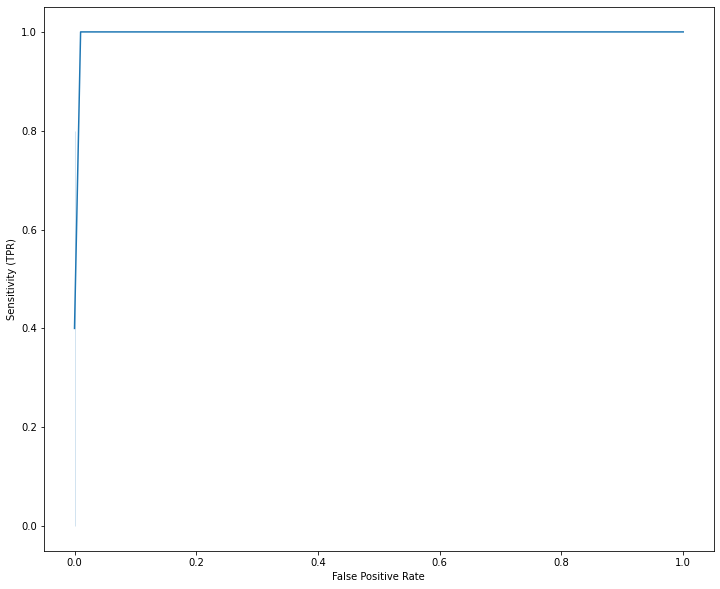

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, rf.predict_proba(x_test_vectorized)[:, 1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.figure(figsize=(12,10))
sns.lineplot(x=fpr,y=tpr,);

plt.xlabel("False Positive Rate");
plt.ylabel("Sensitivity (TPR)");


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, rf.predict_proba(x_test_vectorized)[:, 1])


ValueError: ignored